<a href="https://colab.research.google.com/github/yogita5/ML_bootcamp/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

url_train = 'https://raw.githubusercontent.com/yogita5/test/main/polynomial_train.csv'
url_test = 'https://raw.githubusercontent.com/yogita5/test/main/polynomial_test_data.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
train_data = df_train.values
test_data = df_test.values

In [2]:
X_train = train_data[:,1:-1]
y_train = train_data[:,-1]
X_test = test_data[:,1:]

In [3]:
def polydegree(X,degree):
  m = X.shape[1]
  X_power = []
  X_temp = np.zeros(X.shape[0]) + 1
  temp = []
  pow = np.zeros(m)
  c = 0
  while(c!=m):
    c=0
    temp = X**pow
    for i in range(m):
      X_temp*=temp[:,i]
    X_power.append(X_temp)
    X_temp = np.zeros(X.shape[0]) + 1

    if np.sum(pow)==degree:
      pow,c = check(pow,degree,0)
    else:
      pow[0]+=1
    
  return X_power

In [4]:
def check(pow,degree,c):
  if np.sum(pow[c:])==degree:
    pow[c]=0
    return check(pow,degree,c+1)
  elif c==pow.shape[0]:
    return pow,c
  else:
    pow[c]+=1
    return pow,c

In [5]:
#Z-score normalization
def z_score_normalization(X):
      mu = np.mean(X,axis=0)
      sigma = np.std(X,axis=0)
      X_norm = (X-mu)/sigma
      return(X_norm,mu,sigma)

In [6]:
def cost_function(X,y,w,b):
  m = X.shape[0]
  fw_b = np.dot(X,w)+b
  cost = 1/(2*m)*np.sum((fw_b-y)**2)
  return cost

In [7]:
def compute_gradient(X,y,w,b):
  m = X.shape[0]
  fw_b = np.dot(X,w)+b
  #dj_dw = 1/m*(np.sum(np.dot(fw_b-y,X)))
  dj_dw = 1/m*(np.dot((fw_b-y),X))
  dj_db = 1/m*(np.sum(fw_b-y))
  #print(f"{w}      {b}      {fw_b}     {dj_dw}       {dj_db}  \n")
  return dj_dw,dj_db

In [8]:
def gradient_descent(X,y,w,b,iterations):
  w_calc = w
  b_calc = b
  j_history = []

  for i in range(iterations):
    dj_dw,dj_db = compute_gradient(X,y,w_calc,b_calc)
    w_calc = w_calc-alpha*dj_dw
    b_calc = b_calc-alpha*dj_db
    if i<100000:
      j_history.append(cost_function(X,y,w_calc,b_calc))
    if i%(iterations/10)==0:
      print(f"Iterations: {i}     Cost={j_history[-1]}        b={b_calc}          dj_db = {dj_db} \n")
  
  return w_calc,b_calc,j_history

In [9]:

X_poly = []
X_poly = polydegree(X_train,5)
X_poly = np.array(X_poly)
X_poly = np.transpose(X_poly)
X_poly = X_poly[:,1:]    #to exclude the coloumn containing all 1's
#print(X_poly)
print(X_poly.shape)
#print(np.std(X_poly,axis=0))


(50000, 55)


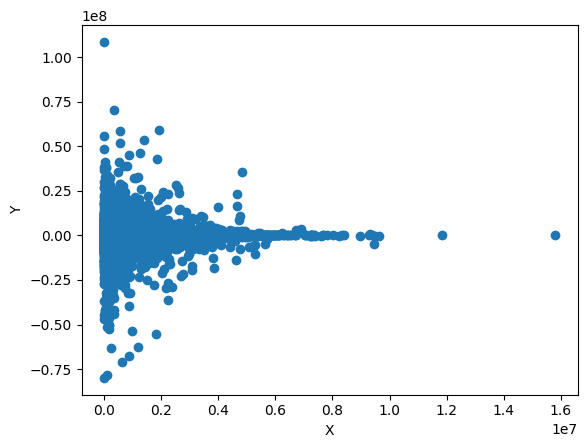

In [10]:

plt.scatter(X_poly[:,10],y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [11]:

w = np.zeros(X_poly.shape[1])
b = 0
alpha = 0.17
num_iter = 20000
iter=np.arange(num_iter)
X_norm,mu,sigma = z_score_normalization(X_poly)
w,b,j_hist = gradient_descent(X_norm,y_train,w,b,num_iter)

fw_b = np.dot(X_norm,w)+b

Iterations: 0     Cost=1710866440039.8005        b=809.3486034750044          dj_db = -4760.874138088261 

Iterations: 2000     Cost=288290.79788436997        b=4760.874138088264          dj_db = 1.828448148444295e-12 

Iterations: 4000     Cost=31487.67031768904        b=4760.874138088266          dj_db = -6.475420377682895e-13 

Iterations: 6000     Cost=9589.499016253847        b=4760.874138088266          dj_db = 2.4485734684276396e-12 

Iterations: 8000     Cost=3461.1036075817724        b=4760.874138088264          dj_db = 6.1364926295937045e-12 

Iterations: 10000     Cost=1425.9612177692018        b=4760.874138088266          dj_db = 1.2492023415688892e-12 

Iterations: 12000     Cost=674.2727332389882        b=4760.874138088265          dj_db = -2.8669876428466527e-12 

Iterations: 14000     Cost=365.10937982254853        b=4760.874138088264          dj_db = -1.8699168435887262e-12 

Iterations: 16000     Cost=222.36540812152612        b=4760.874138088264          dj_db = 5.16

In [12]:
def R2_score(y,pred):
  y_mean = np.mean(y)
  RSS = np.sum((y-fw_b)**2)
  TSS = np.sum((y-y_mean)**2)
  print(1-(RSS/TSS))

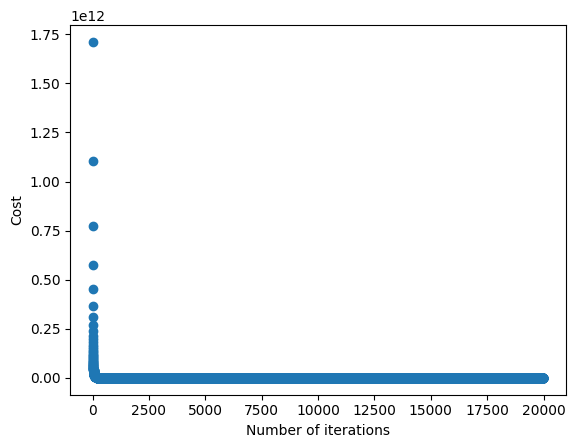

In [13]:
#Cost versus iteration curve
iter = np.arange(num_iter)
plt.scatter(iter,j_hist)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

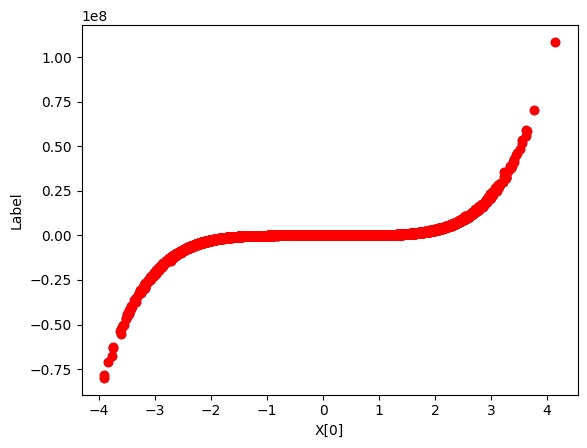

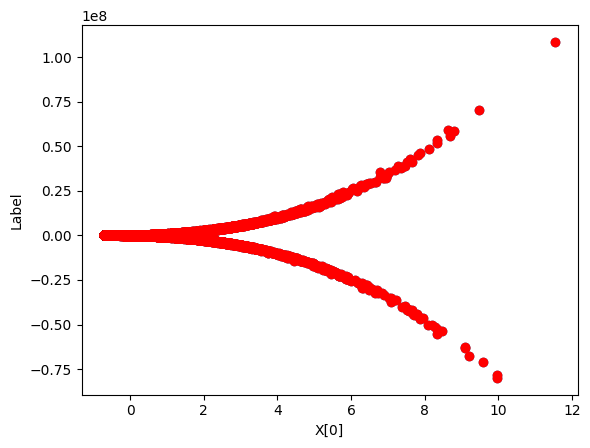

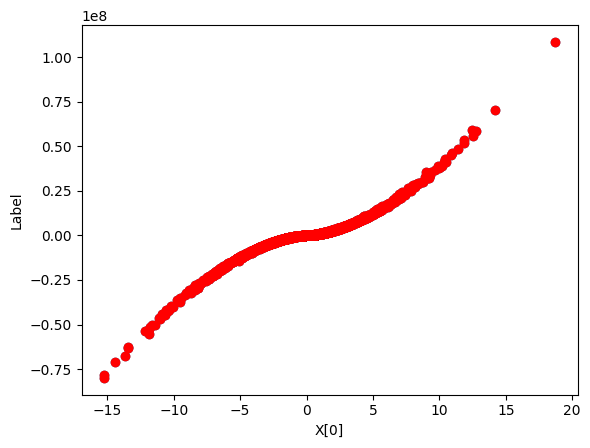

In [14]:
for i in range(3):
 plt.scatter(X_norm[:,i],y_train)
 plt.xlabel('X[0]')
 plt.ylabel('Label')
 plt.scatter(X_norm[:,i],fw_b,color='r')
 plt.show()

In [15]:

R2_score(y_train,fw_b)


0.9999999999685067


In [16]:
X_polytest = polydegree(X_test,5)
X_polytest = np.array(X_polytest).T
X_polytest = X_polytest[:,1:]
X_normtest = (X_polytest-mu)/sigma
y_predicted = np.dot(X_normtest,w) + b
print(y_predicted)

[-5.30433109e+02  2.43173698e+05  4.98322223e+03 ...  1.15498736e+02
 -3.28452857e+00 -1.10564445e+05]


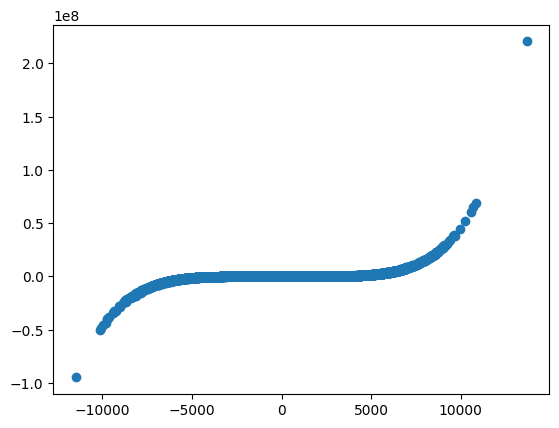

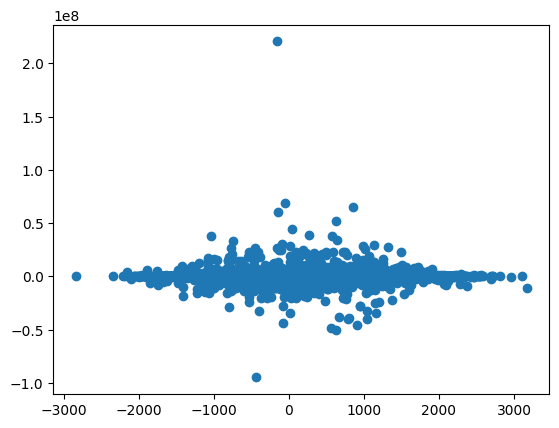

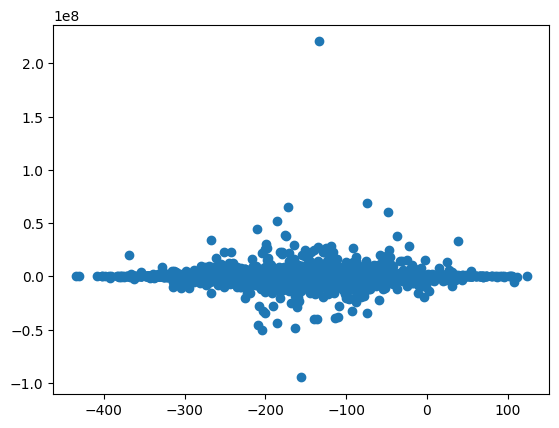

In [17]:
for i in range(3):
 plt.scatter(X_test[:,i],y_predicted)
 plt.show()

In [21]:
df_predicted = pd.DataFrame(data = y_predicted, index = df_test.ids)
df_predicted.to_csv('polynomial_predicted.csv')